Import Libraries:

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import os
import numpy as np

# Define directories
train_dir = r'C:\Users\Sarah Vor\Desktop\csci projects\167\data\seg_train'
test_dir = r'C:\Users\Sarah Vor\Desktop\csci projects\167\data\seg_test'
prediction_dir = r'C:\Users\Sarah Vor\Desktop\csci projects\167\data\seg_pred'

# Data preprocessing for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data preprocessing for testing
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators for training and testing
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'  # One-hot encoding
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=64,
    class_mode='categorical'  # One-hot encoding
)


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


Define Model:

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



# Create CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(128, activation='relu'),
    Dropout(0.5),

    Dense(6, activation='softmax')  # 6 classes
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc*100:.2f}%")

# Prediction logic for flat folder
def load_images_from_directory(directory, target_size):
    images = []
    image_names = []
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Ensure it's an image
            img = load_img(filepath, target_size=target_size)  # Load image
            img_array = img_to_array(img) / 255.0  # Normalize pixel values
            images.append(img_array)
            image_names.append(filename)
    return np.array(images), image_names

# Load and preprocess prediction images
images, image_names = load_images_from_directory(prediction_dir, target_size=(150, 150))
print(f"Loaded {len(images)} images for prediction.")

# Make predictions
predictions = model.predict(images, verbose=1)

# Get predicted class indices
predicted_classes = predictions.argmax(axis=1)

# Map predicted class indices back to class names
class_labels = {v: k for k, v in train_generator.class_indices.items()}  # Reverse the class mapping
predicted_class_names = [class_labels[cls] for cls in predicted_classes]

# Print predictions
for image_name, class_name in zip(image_names, predicted_class_names):
    print(f"{image_name}: {class_name}")






c:\Users\Sarah Vor\Desktop\csci projects\167\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 252s 571ms/step - accuracy: 0.4275 - loss: 1.3981 - val_accuracy: 0.5947 - val_loss: 1.0219
Epoch 2/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 179s 409ms/step - accuracy: 0.5994 - loss: 1.0385 - val_accuracy: 0.7530 - val_loss: 0.6667
Epoch 3/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 170s 387ms/step - accuracy: 0.6756 - loss: 0.8839 - val_accuracy: 0.7260 - val_loss: 0.7408
Epoch 4/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 170s 387ms/step - accuracy: 0.7045 - loss: 0.8182 - val_accuracy: 0.7963 - val_loss: 0.5645
Epoch 5/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 169s 385ms/step - accuracy: 0.7274 - loss: 0.7574 - val_accuracy: 0.8120 - val_loss: 0.5445
Epoch 6/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 169s 385ms/step - accuracy: 0.7419 - loss: 0.7312 - val_accuracy: 0.8213 - val_loss: 0.5258
Epoch 7/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 169s 386ms/step - accuracy: 0.7586 - loss: 0.6854 - val_accuracy: 0.7960 - val_loss: 0.5736
Epoch 8/10
439/439 ━━━━━━━━━━━━━━━━━━━━ 170s 387ms/step - accuracy: 0.7682 -

Predict Live Demo:

In [21]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import time

# Function to predict a single image
def predict_single_image(model, image_path, target_size, class_indices):
    """
    Predict the class of a single image using the trained model.

    Parameters:
    - model: The trained Keras model.
    - image_path: Path to the input image.
    - target_size: Tuple (width, height) to resize the image.
    - class_indices: Dictionary of class indices.

    Returns:
    - Predicted class name.
    """
    start_time = time.time()  # Track start time for performance measurement

    # Load and preprocess the image
    img = load_img(image_path, target_size=target_size)  # Resize the image if needed
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

    # Make prediction
    predictions = model.predict(img_array, verbose=0)  # Predict without verbosity for speed
    predicted_class = np.argmax(predictions, axis=1)[0]

    # Map predicted class index to class name
    class_labels = {v: k for k, v in class_indices.items()}  # Reverse the class mapping
    result = class_labels[predicted_class]

    end_time = time.time()  # Track end time for performance measurement
    print(f"Prediction completed in {end_time - start_time:.4f} seconds")

    return result

# Example usage
image_path = r"C:\Users\Sarah Vor\Desktop\csci projects\167\test1.jpg"  #Expected class: glacier, epoch 1 gave sea 
#image_path = r"C:\Users\Sarah Vor\Desktop\csci projects\167\test2.jpg"  #Expected class: glacier
#image_path = r"C:\Users\Sarah Vor\Desktop\csci projects\167\test1.jpg"  # Set the image path here


# Ensure the model is loaded and trained
target_size = (150, 150)  # Same size as the training data
predicted_class_name = predict_single_image(model, image_path, target_size, train_generator.class_indices)

print(f"The image '{image_path}' belongs to the category: {predicted_class_name}")


Prediction completed in 0.2321 seconds
The image 'C:\Users\Sarah Vor\Desktop\csci projects\167\test1.jpg' belongs to the category: glacier


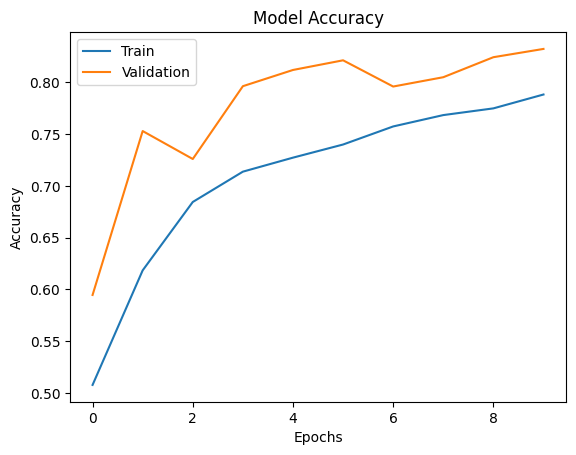

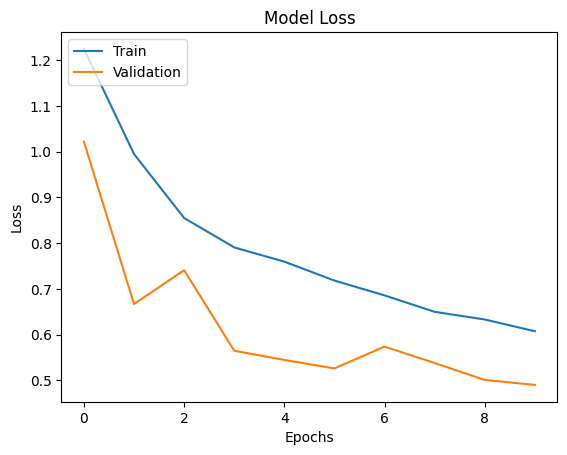

In [22]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 227ms/step


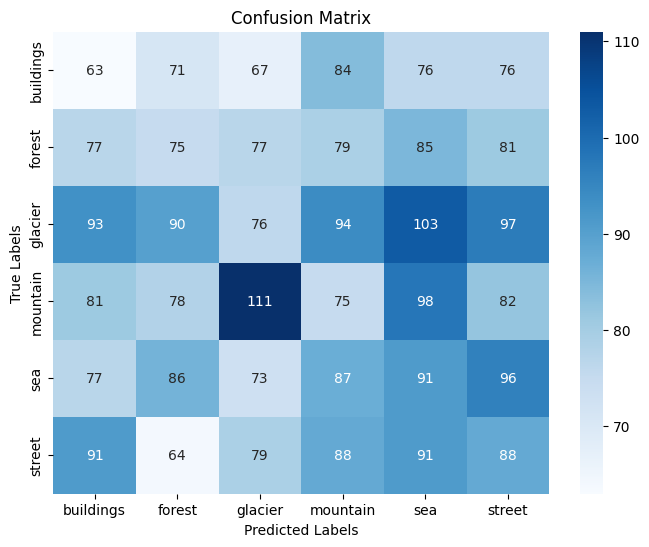

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get true labels and predicted labels
true_labels = test_generator.classes
predicted_labels = model.predict(test_generator, verbose=1).argmax(axis=1)

# Generate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=train_generator.class_indices.keys(), yticklabels=train_generator.class_indices.keys())
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Analysis:
sd

In [ ]:
commit test